## Halpha Imaging of Group Galaxies ##

The goal is to get the total number of galaxies that we have targeted so farwith Halpha imaging.


We compiled the list in a google sheet

https://docs.google.com/spreadsheets/d/1qNwKZ_BA6R42wpKALCpNAWE2EBqoiqXGgZPxupdKMsI/edit?usp=sharing

The third sheet has a list of the centers for each group.

Becky sent the RASSCALS and WBL catalogs, so I can search these to get the central redshift of each group.

The catalogs are in 

/home/rfinn/research/HalphaGroups/catalogs

and include:
* RASSCALS_groups_positions.fits 
* WBL_groups_positions.fits
* UAT_group_centers.csv

In [1]:
from astropy.io import fits
from astropy.io import ascii
from astropy.coordinates import SkyCoord
from astropy import units as u
import os
from matplotlib.patches import Rectangle

In [2]:
#catalog_dir = '/Users/rfinn/myDropbox/Research/HalphaGroups/catalogs/'
homedir = os.getenv("HOME")
catalog_dir = homedir+'/research/HalphaGroups/catalogs/'

### Read in data files###

In [3]:
rasscals_file = 'RASSCALS_groups_positions.fits'
wbl_file = 'WBL_groups_positions.fits'
groups_file = 'UAT_group_centers.csv'

In [4]:
rasc = fits.getdata(catalog_dir+rasscals_file,1)
wbl = fits.getdata(catalog_dir+wbl_file,1)
gc = ascii.read(catalog_dir+groups_file, delimiter=',')

In [5]:
group_coord = SkyCoord(gc['RA'],gc['Dec'], unit=(u.hourangle,u.deg),frame='icrs')

In [6]:
gc['Filter'][0]

'ha16'

In [7]:
%run ~/github/HalphaImaging/python3/uat_all_galaxies_fov.py

## Looking at our galaxies relative to NSA ##

In [8]:
from astropy.io import fits
from matplotlib import pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from astropy.table import Table

In [9]:
catalog_dir = homedir+'/research/HalphaGroups/catalogs/'
plot_dir = homedir+'/research/HalphaGroups/plots/'

In [23]:
ha = Table.read(catalog_dir+'uat_halpha_nsa.fits')
mstar = fits.getdata(catalog_dir+'uat_halpha_moustakas_mstar.fits')
nsa = fits.getdata(homedir+'/research/NSA/nsa_v0_1_2.fits')
nsa_mstar = fits.getdata(homedir+'/research/NSA/nsa_v1_2_fsps_v2.4_miles_chab_charlot_sfhgrid01.fits')

In [11]:
ha.size

2222

In [12]:
# NSA properties
NUVr = nsa.ABSMAG[:,1] - nsa.ABSMAG[:,4]
Mr = nsa.ABSMAG[:,4]
# Halpha sample
NUVr_ha = ha.ABSMAG[:,1] - ha.ABSMAG[:,4]
Mr_ha = ha.ABSMAG[:,4]

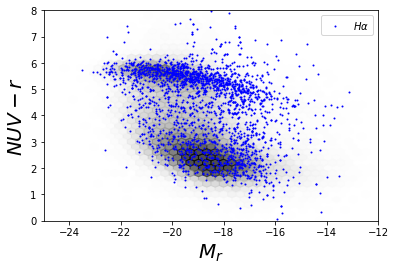

In [13]:
# make figure of NUV-r vs Mr
plt.figure()
plt.subplots_adjust(bottom=.15)
sp=plt.hexbin(Mr,NUVr,gridsize=(40,20),extent=(-25,-12,0,8),alpha=.7,cmap='gray_r',vmin=0,vmax=1000)
plt.plot(Mr_ha,NUVr_ha,'b.',markersize=2, label=r'$H\alpha$')
plt.axis([-25,-12,0,8])
plt.legend()
plt.xlabel('$M_r$',fontsize=20)
plt.ylabel('$NUV - r$',fontsize=20)
plt.savefig(plot_dir+'NUVr-Mr.pdf')

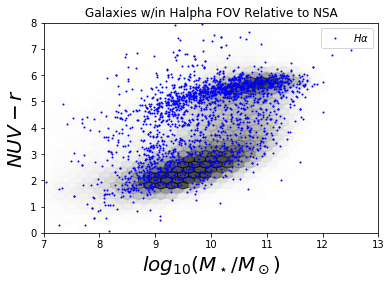

In [14]:
# make figure of NUV-r vs M*
plt.figure()
plt.subplots_adjust(bottom=.15)
sp=plt.hexbin(nsa_mstar.MSTAR_50,NUVr,extent=(6,14,0,8),gridsize=(40,20),alpha=.7,cmap='gray_r',vmin=0,vmax=1000)
plt.plot(mstar.MSTAR_50,NUVr_ha,'b.',markersize=2, label=r'$H\alpha$')
plt.axis([7,13,0,8])
plt.legend()
plt.xlabel('$log_{10}(M_\star/M_\odot)$',fontsize=20)
plt.ylabel('$NUV - r$',fontsize=20)
plt.title('Galaxies w/in Halpha FOV Relative to NSA')
plt.savefig(plot_dir+'NUVr-Mstar.pdf')

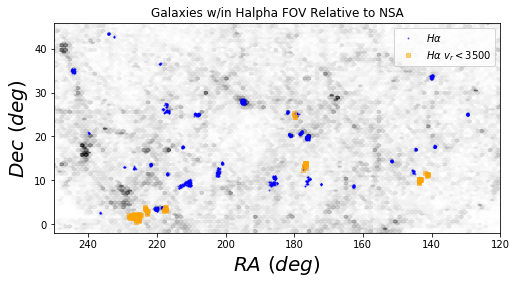

In [22]:
vr = ha['Z']*3.e5
virgoflag = vr < 3500
# make figure of NUV-r vs Mr
plt.figure(figsize=(8,4))

plt.subplots_adjust(bottom=.15)
sp=plt.hexbin(nsa.RA,nsa.DEC,gridsize=(300,100),alpha=.7,cmap='gray_r',vmin=0,vmax=100)
plt.plot(ha.RA,ha.DEC,'b.',markersize=2, label=r'$H\alpha$',alpha=0.5)
plt.plot(ha.RA[virgoflag],ha.DEC[virgoflag],'gs',color='orange',markersize=4,mfc=None, label=r'$H\alpha \ v_r<3500$',alpha=0.5)
plt.axis([-25,-12,0,8])
plt.legend()
plt.xlabel('$RA \ (deg)$',fontsize=20)
plt.ylabel('$Dec \ (deg)$',fontsize=20)
plt.title('Galaxies w/in Halpha FOV Relative to NSA')
plt.axis([120,250,-2,46])
plt.gca().invert_xaxis()
plt.savefig(plot_dir+'positions.pdf')

In [24]:
ha[virgoflag]

IAUNAME,SUBDIR,RA,DEC,ISDSS,INED,ISIXDF,IALFALFA,IZCAT,ITWODF,MAG,Z,ZSRC,SIZE,RUN,CAMCOL,FIELD,RERUN,XPOS,YPOS,ZLG,ZDIST,ZDIST_ERR,NSAID,NMGY [7],NMGY_IVAR [7],OK,RNMGY [7],ABSMAG [7],AMIVAR [7],EXTINCTION [7],KCORRECT [7],KCOEFF [5],MTOL [7],B300,B1000,METS,MASS,XCEN,YCEN,NPROF [7],"PROFMEAN [15,7]","PROFMEAN_IVAR [15,7]","QSTOKES [15,7]","USTOKES [15,7]","BASTOKES [15,7]","PHISTOKES [15,7]",PETROFLUX [7],PETROFLUX_IVAR [7],FIBERFLUX [7],FIBERFLUX_IVAR [7],BA50,PHI50,BA90,PHI90,SERSICFLUX [7],SERSICFLUX_IVAR [7],SERSIC_N,SERSIC_BA,SERSIC_PHI,ASYMMETRY [7],CLUMPY [7],DFLAGS [7],AID,PID,DVERSION,PROFTHETA [15],PETROTHETA,PETROTH50,PETROTH90,SERSIC_TH50,OBJNO,PLATE,FIBERID,MJD,COEFF [7],VDISP,D4000,D4000ERR,FA,FAERR,S2FLUX,S2FLUXERR,S2EW,S2EWERR,S2VMEAS,S2VMERR,S2RATIO,HAFLUX,HAFLUXERR,HAEW,HAEWERR,HAVMEAS,HAVMERR,N2FLUX,N2FLUXERR,N2EW,N2EWERR,N2VMEAS,N2VMERR,HBFLUX,HBFLUXERR,HBEW,HBEWERR,HBVMEAS,HBVMERR,O1FLUX,O1FLUXERR,O1EW,O1EWERR,O1VMEAS,O1VMERR,O2FLUX,O2FLUXERR,O2EW,O2EWERR,O2VMEAS,O2VMERR,O3FLUX,O3FLUXERR,O3EW,O3EWERR,O3VMEAS,O3VMERR,AHGEW,AHGEWERR,AHDEW,AHDEWERR,NE3EW,NE3EWERR,NE5EW,NE5EWERR,AV,S2NSAMP,RACAT,DECCAT,ZSDSSLINE,SURVEY,PROGRAMNAME,PLATEQUALITY,TILE,PLUG_RA,PLUG_DEC
bytes19,bytes27,float64,float64,int32,int32,int32,int32,int32,int32,float32,float32,bytes7,float32,int16,uint8,int16,bytes3,float32,float32,float32,float32,float32,int32,float32,float32,int16,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int32,int32,int32,bytes8,float32,float32,float32,float32,float32,int32,int32,int32,int32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float64,float64,float32,bytes6,bytes23,bytes8,int32,float64,float64
J092414.56+110638.1,09h/p10/J092414.56+110638.1,141.0607087783769,11.110614481986609,75078,67526,-1,-1,54026,-1,15.022077,0.01143651,sdss,0.07,3631,4,165,301,1774.0764,775.9609,0.011013722,0.011946909,0.00046699046,73860,38.768238 .. 2729.7837,0.27460542 .. 0.0001663937,1,37.945488 .. 2731.9446,-14.257736 .. -18.882383,350.11652 .. 1051.8278,0.28541285 .. 0.050919853,-0.0037500975 .. 0.001768512,1.4582521e-10 .. 6.309452e-06,0.00015927284 .. 1.1948608,0.008672039,0.008723367,0.021129128,2719065300.0,213.360595703125,307.6498107910156,0.07529167 .. 2.117413,0.07529167 .. 0.0,957.02527 .. 0.0,0.055033892 .. -0.19200292,-0.0012497399 .. -0.15810755,0.89564824 .. 0.60163623,-0.6504403 .. -70.264885,33.570686 .. 2761.2256,0.59160686 .. 0.0005515461,0.2811844 .. 78.9281,223.30237 .. 0.35645145,0.73456997,23.587433,0.5227494,25.562057,29.806496 .. 2702.4663,1.0562601 .. 0.0031819884,0.895319,0.44174984,25.399902,0.04419878 .. -0.066940814,0.17024566 .. -0.00851047,0 .. 0,2,33,v2_1_5,0.22341923 .. 258.39,21.133516,10.0433035,22.635803,14.117937,174051850,1740,518,53050,1.02e-43 .. 6e-45,16.166962,1.5097779,0.034008104,0.14165127,0.02965581,31.171236,4.7600546,2.090249,0.4848607,44.037373,11.500152,0.73751515,35.731613,3.3506281,2.3027413,0.36586443,41.266853,5.07228,12.1294775,3.3961675,0.7816901,0.2972891,47.734783,10.906835,10.744432,5.7094803,0.6726595,0.28253794,110.79803,35.4179,-2.8524756,3.6675453,-0.18328112,0.28751913,467.6706,1264.9885,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,17.776989,4.8189273,1.1478511,0.40905565,58.533005,19.337545,2.1981158,0.88317686,-1.6608678,0.9513557,1.6645128,1.1968409,-9999.0,-9999.0,0.45381522,15.011393,141.06069315144563,11.11059

Text(0.5, 0, 'Recession Velocity (km/s)')

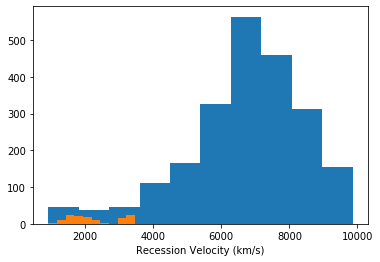

In [19]:
plt.figure()
vr = ha['Z']*3.e5
virgoflag = vr < 3500
plt.hist(vr)
plt.hist(vr[virgoflag])
plt.xlabel('Recession Velocity (km/s)')

In [27]:
co = fits.getdata(homedir+'/github/Virgo/tables/CO-MasterFile-2018Feb16.fits')

## Virgo III Group ##

We realized that the NGC 5846 Group that Becky has been targeting is also a target in the Virgo Filaments study.

Below we show 

Becky's pointings are centered at:


| Galaxy | RA(hr) | Dec(dms) | RA(deg) | DEC(deg) |
|-------|-------|-------|-------|--------|
|NGC5846-1	|15:06:36	|1:45:00	|226.665	|1.758|
|NGC5846-2	|15:00:43	|1:54:00	|225.262	|1.839|
|NGC5846-3	|15:11:06	|1:42:00	|227.787	|1.706|
|NGC5846-4	|15:02:55	|0:50:00	|225.726	|0.832	|			
|NGC5846-5	|14:52:48	|3:33:00	|210.173	|3.55 	|	
|NGC5846-6	|14:51:00	|2:42:00	|222.746	|2.708	|			
|NGC5846-7	|14:29:50	|3:25:00	|217.4587	|3.422|
				

In [98]:
def convert_hexra()

210.17333333333332
3.55


In [115]:
mosaic_ra = np.array([226.665,225.262,227.787,225.726,210.173,222.746,217.4587])
mosaic_dec = np.array([1.758,1.839,1.706,0.832,3.55,2.708,3.422 ])
mosaic_labels = ['1','2','3','4','5','6','7']

hex_ra = ['15:06:36','15:00:43','15:11:06','15:02:55','14:52:48','14:51:00','14:29:50']
hms_dec = ['1:45:00','1:54:00','1:42:00','0:50:00','3:33:00','2:42:00','3:25:00']
comb = [i+' '+j for i,j in zip(hex_ra,hms_dec)]
## take 2 - using different ra and decs


In [116]:
comb

['15:06:36 1:45:00',
 '15:00:43 1:54:00',
 '15:11:06 1:42:00',
 '15:02:55 0:50:00',
 '14:52:48 3:33:00',
 '14:51:00 2:42:00',
 '14:29:50 3:25:00']

In [119]:
mosaic_centers = SkyCoord((comb),unit=(u.hourangle,u.deg))

In [28]:
# cull NSA
flag = nsa.Z < (3700./3.e5)
virgo_nsa = nsa[flag]
virgo_nsa_mstar = nsa_mstar[flag]

In [59]:
flag = ha.Z < (3700./3.e5)
virgo_ha = ha[flag]

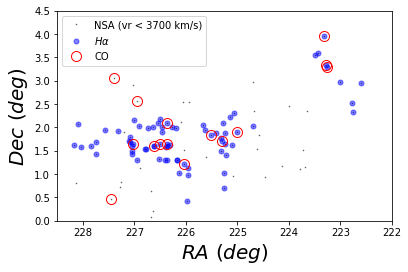

In [31]:
# NGC 5846 - Virgo 3
# plotting Halpha with CO detections
plt.figure()
plt.subplots_adjust(bottom=.15)
plt.plot(virgo_nsa.RA,virgo_nsa.DEC,'k.',markersize=1,color='0.3',label='NSA (vr < 3700 km/s)')#gridsize=(200,100),alpha=.7,cmap='gray_r',vmin=0,vmax=100)
plt.plot(ha.RA,ha.DEC,'bo',markersize=5, label=r'$H\alpha$',alpha=0.5)
plt.plot(co.RA,co.DEC,'ro', markersize=10,markerfacecolor='None', label='CO')
plt.axis([222,228.5,0,4.5])
plt.legend(loc='upper left')
plt.xlabel('$RA \ (deg)$',fontsize=20)
plt.ylabel('$Dec \ (deg)$',fontsize=20)
plt.gca().invert_xaxis()
plt.savefig(plot_dir+'NGC5846-positions.pdf')

Benedetta's galaxies for SITELLE are:

Double pair
* V6167
* V6172



In [32]:
vids = [6167, 6172, 6444, 6416, 6370, 6438, 6234, 6134, 6083, 6019, 5570, 5345, 5196]
vfids = ['VFID'+str(k) for k in vids]

In [33]:
vfids

['VFID6167',
 'VFID6172',
 'VFID6444',
 'VFID6416',
 'VFID6370',
 'VFID6438',
 'VFID6234',
 'VFID6134',
 'VFID6083',
 'VFID6019',
 'VFID5570',
 'VFID5345',
 'VFID5196']

### Read in Virgo Filaments Catalog ##

In [35]:
vf = Table.read(homedir+'/research/Virgo/tables-north/v1/vf_north_v1_main.fits')

In [107]:
def draw_mosaic(x,y,ax,dx=1,dy=1):
    for i in range(len(x)):
        rect = Rectangle((x[i],x[i]),dx,dy,color='g')
        ax.add_patch(rect)

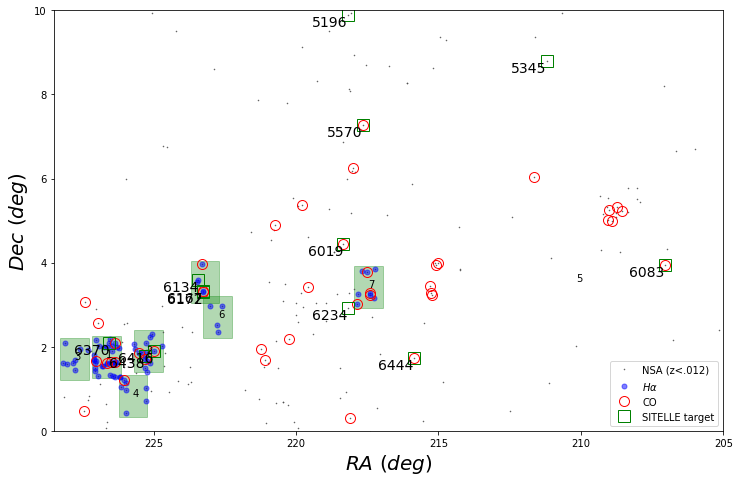

In [125]:
# NGC 5846 - Virgo 3
# plotting Halpha with CO detections
plt.figure(figsize=(12,8))
plt.subplots_adjust(bottom=.15)
plt.plot(virgo_nsa.RA,virgo_nsa.DEC,'k.',markersize=1,color='0.3',label='NSA (z<.012)')#gridsize=(200,100),alpha=.7,cmap='gray_r',vmin=0,vmax=100)
plt.plot(virgo_ha.RA,virgo_ha.DEC,'bo',markersize=5, label=r'$H\alpha$',alpha=0.5)
plt.plot(co.RA,co.DEC,'ro', markersize=10,markerfacecolor='None', label='CO')
#flag = vf['COflag']
#plt.plot(vf['RA'][flag],vf['DEC'][flag],'rx',markersize=20,mfc='None',label='SITELLE target')
plt.axis([205,228.5,0,10])

plt.xlabel('$RA \ (deg)$',fontsize=20)
plt.ylabel('$Dec \ (deg)$',fontsize=20)
plt.gca().invert_xaxis()


plt.plot(vf['RA'][vids],vf['DEC'][vids],'gs',markersize=12,mfc='None',label='SITELLE target')
plt.legend(loc='lower right')

# label SITELLE pointings
ax = plt.gca()
k=0
for i,j in zip(vf['RA'][vids],vf['DEC'][vids]):
    ax.annotate(str(vids[k]), xy=(i, j),horizontalalignment='right', verticalalignment='top',fontsize=14)
    k += 1

draw_mosaic(mosaic_ra,mosaic_dec,ax)

# test 
dx=1
dy=1
for i in range(len(mosaic_ra)):
    rec = Rectangle((mosaic_centers[i].ra.value-.5*dx,mosaic_centers[i].dec.value-.5*dy),dx,dy,color='g',alpha=.3)
    ax.add_patch(rec)
    plt.text(mosaic_ra[i],mosaic_dec[i],str(i+1))
plt.savefig(plot_dir+'NGC5846-positions-sitelle-bigFOV.pdf')

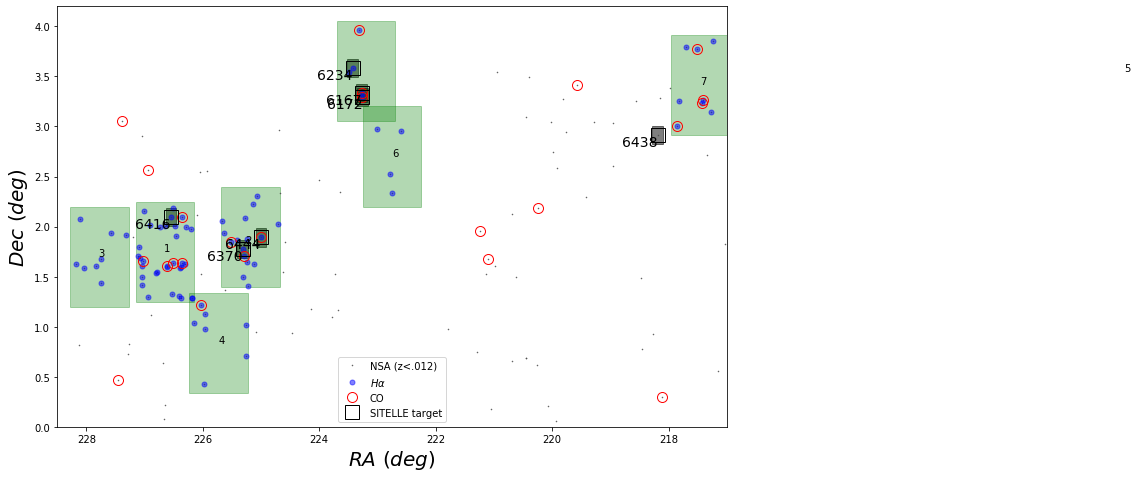

In [133]:
# NGC 5846 - Virgo 3
# plotting Halpha with CO detections
plt.figure(figsize=(12,8))
plt.subplots_adjust(bottom=.15)
plt.plot(virgo_nsa.RA,virgo_nsa.DEC,'k.',markersize=1,color='0.3',label='NSA (z<.012)')#gridsize=(200,100),alpha=.7,cmap='gray_r',vmin=0,vmax=100)
plt.plot(virgo_ha.RA,virgo_ha.DEC,'bo',markersize=5, label=r'$H\alpha$',alpha=0.5)
plt.plot(co.RA,co.DEC,'ro', markersize=10,markerfacecolor='None', label='CO')
plt.plot(vf['RA'][vids],vf['DEC'][vids],'ks',markersize=14,mfc='None',label='SITELLE target')
plt.legend()
# just checking to make sure the CO list is up to date
# going to overplot objects with CO flag in the vf_north_v0_main file

#flag = vf['COflag']
#plt.plot(vf['RA'][flag],vf['DEC'][flag],'rx',markersize=20,mfc='None',label='SITELLE target')
ymax=4.2
xmin=217
# label SITELLE pointings
ax = plt.gca()
k=0
for i,j in zip(vf['RA'][vids],vf['DEC'][vids]):
    if j > ymax:
        continue
    if i < xmin:
        continue
    plt.text(i,j,str(vids[k]),horizontalalignment='right', verticalalignment='top',fontsize=14)
    k += 1
    dx = 11./60
    dy = dx
    rec = Rectangle((i-.5*dx,j-0.5*dy),dx,dy,color='k',alpha=.5)
    ax.add_patch(rec)
plt.axis([xmin,228.5,0,ymax])
# test 
dx=1
dy=1
for i in range(len(mosaic_ra)):
    rec = Rectangle((mosaic_centers[i].ra.value-.5*dx,mosaic_centers[i].dec.value-.5*dy),dx,dy,color='g',alpha=.3)
    ax.add_patch(rec)
    plt.text(mosaic_ra[i],mosaic_dec[i],str(i+1))
    

plt.xlabel('$RA \ (deg)$',fontsize=20)
plt.ylabel('$Dec \ (deg)$',fontsize=20)
plt.gca().invert_xaxis()
plt.savefig(plot_dir+'NGC5846-positions-sitelle-smallFOV.pdf')